In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("T1.csv")

In [3]:
data.head(5)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
data = data[data['LV ActivePower (kW)'] > 0]

# Removing missing values:

data = data.dropna()

# Printing the data description:

print(data.describe())

       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         39692.000000      39692.000000                   39692.000000   
mean           1664.751281          8.769781                    1829.739672   
std            1264.303861          3.773594                    1306.418817   
min               0.000200          1.208934                       0.000000   
25%             481.681473          5.911951                     595.684321   
50%            1394.047973          8.114283                    1596.105035   
75%            2908.239746         11.099597                    3306.484806   
max            3618.732910         25.206011                    3600.000000   

       Wind Direction (°)  
count        39692.000000  
mean           115.532274  
std             86.276846  
min              0.000000  
25%             49.041458  
50%             70.241829  
75%            197.156849  
max            359.997589  


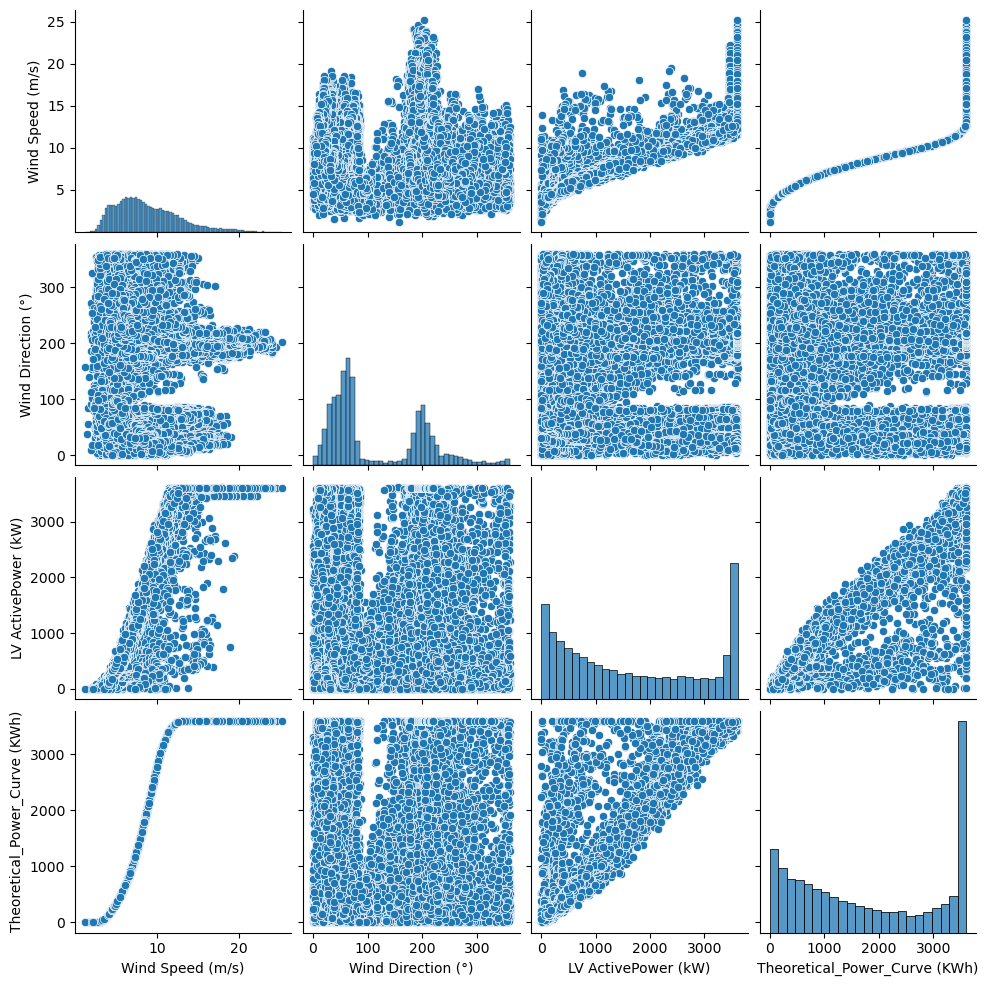

In [6]:
# Creating Pair plot of Wind Speed, Wind Direction, LV ActivePower, and Theoretical_Power_Curve

sns.pairplot(data=data, vars=["Wind Speed (m/s)", "Wind Direction (°)", "LV ActivePower (kW)", "Theoretical_Power_Curve (KWh)"])
plt.show()

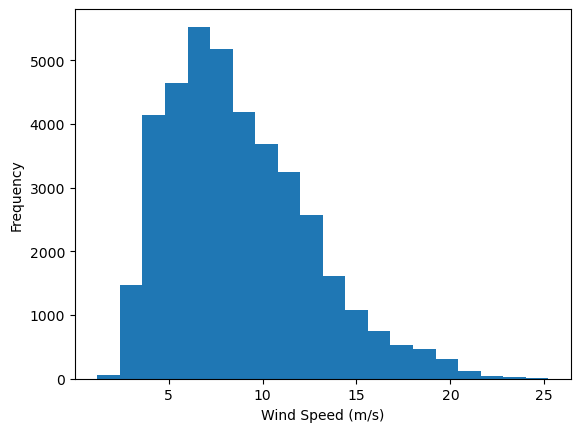

In [7]:
plt.hist(data["Wind Speed (m/s)"], bins=20)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

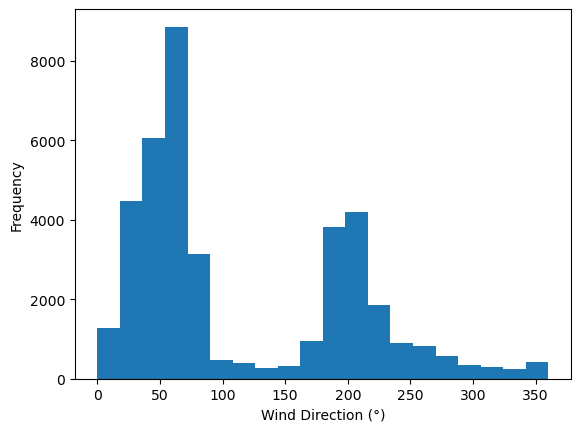

In [8]:
plt.hist(data["Wind Direction (°)"], bins=20)
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")
plt.show()

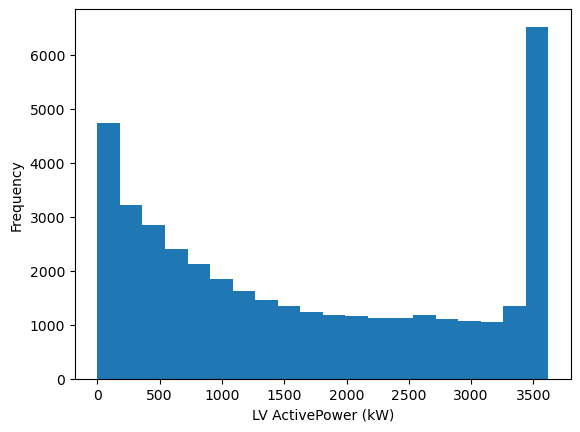

In [9]:
plt.hist(data["LV ActivePower (kW)"], bins=20)
plt.xlabel("LV ActivePower (kW)")
plt.ylabel("Frequency")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Preparing the data:

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']

# Splitting the data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Building the model:
model = LinearRegression()
model.fit(X_train, y_train)

    # Evaluating the model, calculating metrics:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

    # Printing the coefficients and intercept:

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Coefficients: [50.847803    0.30246839  0.80591175]
Intercept: -291.0672298230452
Mean Squared Error: 72844.55158912737
Mean Absolute Error: 137.72002672520242
R-squared: 0.9547508782637542


In [ ]:
# Thus the energy genereation from a wind turbine has been predicted with a linear regression model and the R-squared value is 0.95.the model seems to fit the data well and can be used for predicting the energy generation of the wind turbine based on its wind speed, wind direction, and theoretical power curve.